In [385]:
#PART 1  My question is is there any relationship between total salary and team wins counts.

In [386]:
# First I am declaring modules which I will use.
%matplotlib inline
import pandas as pd
import scipy as sp
import thinkstats2 as ts
import thinkplot as tp

In [387]:
# Second I am reading Teams.csv and Salaries.csv
teams = pd.read_csv('Teams.csv')
salaries = pd.read_csv('Salaries.csv')

In [388]:
#PART 2 Now I will show my colums which I am using.
print(teams.columns)
print(salaries.columns)

Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro'],
      dtype='object')
Index(['yearID', 'teamID', 'lgID', 'playerID', 'salary'], dtype='object')


In [389]:
#Ok now for the make my queries more easier I am changing "teams" Data index to (yearId, teamId)
teams = teams.set_index(['yearID', 'teamID'])

In [390]:
# So now I have to calculate total salaries 
salaries_yearID_teamID = salaries.groupby(['yearID','teamID'])['salary'].sum()

In [391]:
# After the previous cell now I am adding salaries information to my DataSet
teams = teams.join(salaries_yearID_teamID)

In [392]:
# PART 3 Okey now for the plot my data I am writing a function which return histogram,cdf and pmf that using thinkstats functions.
# This function taking two parameters first is my dataset called teams and second is year which I can make queries according to years. 
def plotTeamByYear(teams,year):
    hist = {}
    # I am making query which according to year.
    teams_year = teams.xs(year)
    # Now I am using for loop and make histogram each baseball club. so according to my histogram key is Win rate and value is total salary that club
    for i in teams_year.index:
        hist[teams_year['W'][i]]=  teams_year['salary'][i]
    # I am assign hist to my thinkstats histogram function.
    hist = ts.Hist(hist)
    # Now I am assign cdfTeams my histogram converting Cdf
    cdfTeams = ts.Cdf(hist,label=year)
    # Same thing for the Pmf
    pmfTeams = ts.Pmf(hist,label=year)
    # Finally I am returning my histogram, cdf, and pmf.
    return hist,cdfTeams,pmfTeams

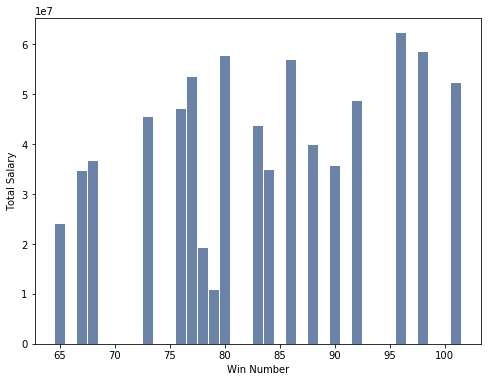

In [393]:
# Ok well let show some plot,
hist,plotCdf,plotPmf = plotTeamByYear(teams,1997)
# First I am plotthing that data according to 1997 and show Histogram.
tp.Hist(hist)
tp.Show(xlabel='Win Number', ylabel='Total Salary')

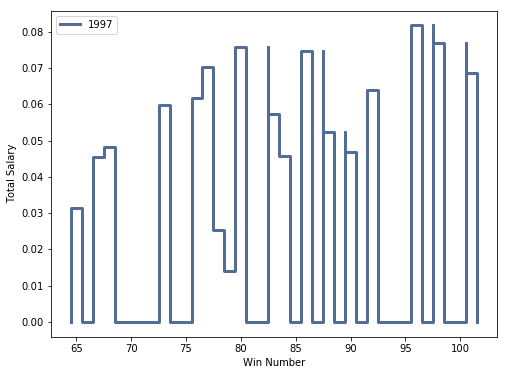

In [394]:
# Here I am Plottıng pmf
tp.Pmf(plotPmf)
tp.Show(xlabel='Win Number', ylabel='Total Salary')

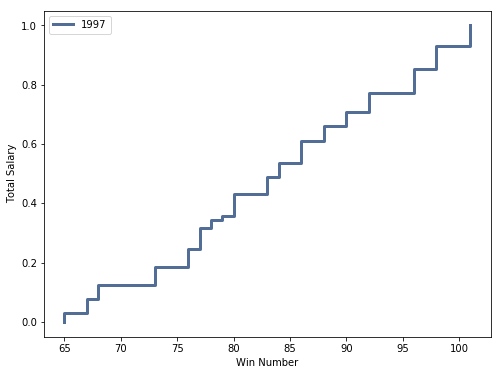

In [395]:
# And fınally cdf
tp.Cdf(plotCdf)
tp.Show(xlabel='Win Number', ylabel='Total Salary')

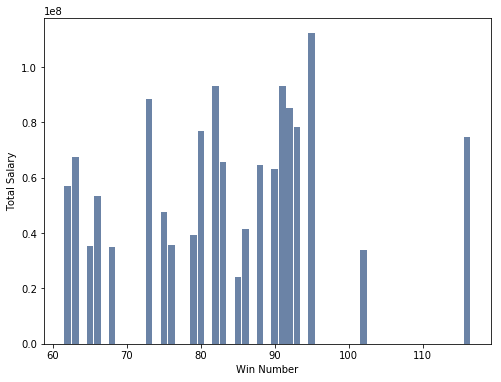

In [396]:
# Okay now I am doing same thing for the year 2001
hist,plotCdf,plotPmf = plotTeamByYear(teams,2001)
tp.Hist(hist)
tp.Show(xlabel='Win Number', ylabel='Total Salary')

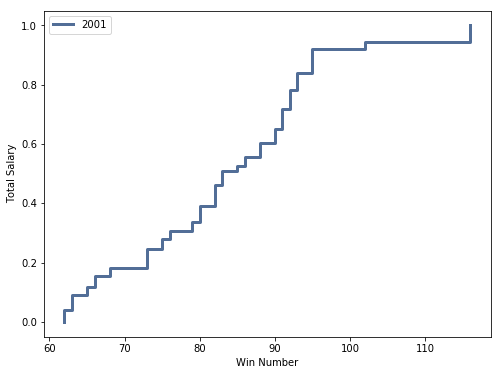

In [397]:
tp.Cdf(plotCdf)
tp.Show(xlabel='Win Number', ylabel='Total Salary')

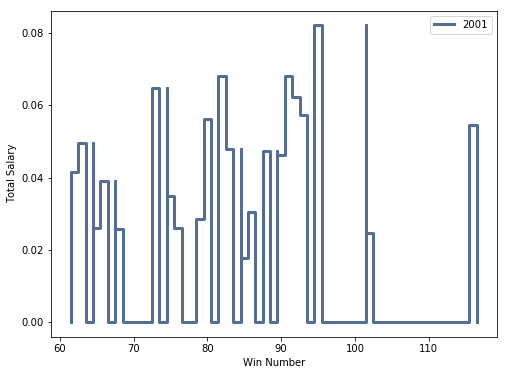

In [398]:
tp.Pmf(plotPmf)
tp.Show(xlabel='Win Number', ylabel='Total Salary')

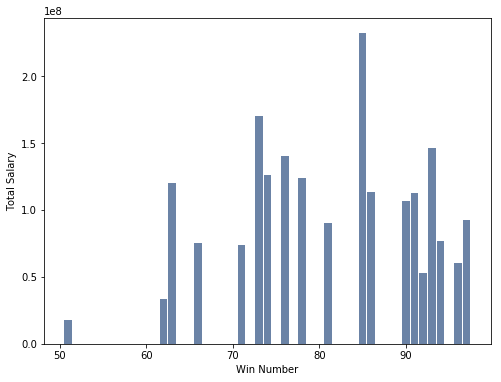

In [399]:
# Now for the seeing different to that data I am finally adding to 2013 data.
hist,plotCdf,plotPmf = plotTeamByYear(teams,2013)
tp.Hist(hist)
tp.Show(xlabel='Win Number', ylabel='Total Salary')

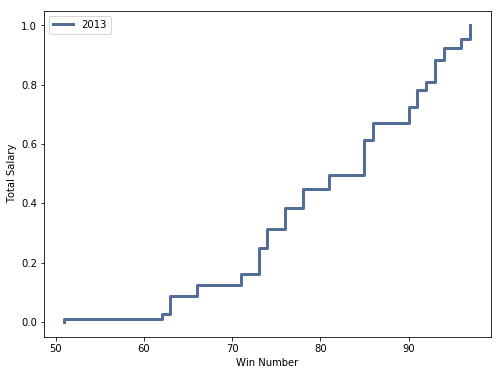

In [400]:
tp.Cdf(plotCdf)
tp.Show(xlabel='Win Number', ylabel='Total Salary')

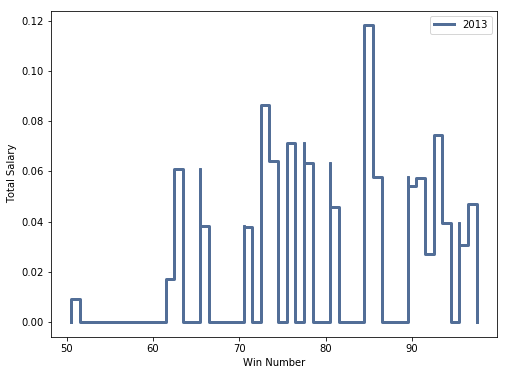

In [401]:
tp.Pmf(plotPmf)
tp.Show(xlabel='Win Number', ylabel='Total Salary')

In [402]:
# PART 4 I thought exponential distributions is good for the that case because I want to make quoteion from books. "In the real world, exponential distributions come up when we look at a series of events and measure the times between events, called interarrival times." so for the observing events(win rate) and salaries change in the year is the best distrubiton.

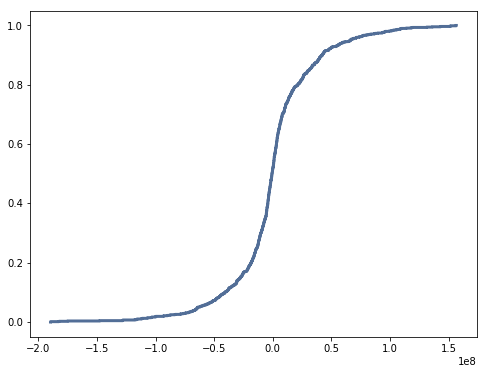

In [403]:
# First of all I will take a diffrences Win rate and salary in time interval and showing it Cdf plot for the make that I will use diff() function
diffsSal = teams.salary.diff()
cdf = ts.Cdf(diffsSal)
tp.Cdf(cdf)
tp.Show()

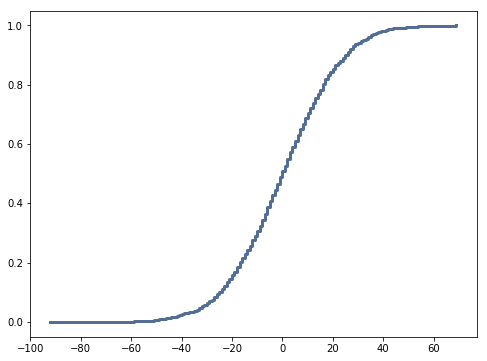

In [404]:
# And now you will see the win rate
diffsWin = teams.W.diff()
cdf = ts.Cdf(diffsWin)
tp.Cdf(cdf)
tp.Show()

In [405]:
# PART 5 So for that part I guess I did this part in part two because I did built one relationship in Win-Total Salary and showed in one plotting.


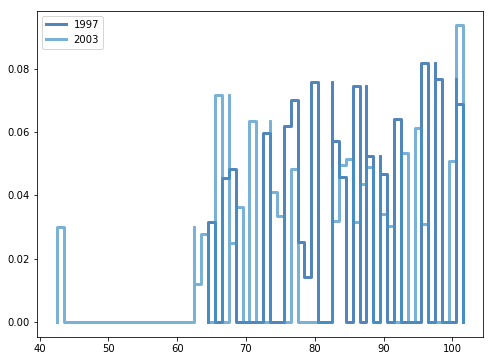

In [406]:
# PART 6 So for testing my claim first of all I am decided compare my data in year between 1997,2003 and 2013 So in Pmf I can show my hpothesis
# So first of all I am used my previous my function named plotTeamByYear
first_hist,first_Cdf,first_Pmf = plotTeamByYear(teams,1997)
second_hist,second_Cdf,second_Pmf = plotTeamByYear(teams,2003)
third_hist,third_Cdf,third_Pmf = plotTeamByYear(teams,2013)

# So finally I am plotting 1997 and 2003 data in Pmf form..
tp.PrePlot(2)
tp.Pmfs([first_Pmf,second_Pmf])
tp.Show()

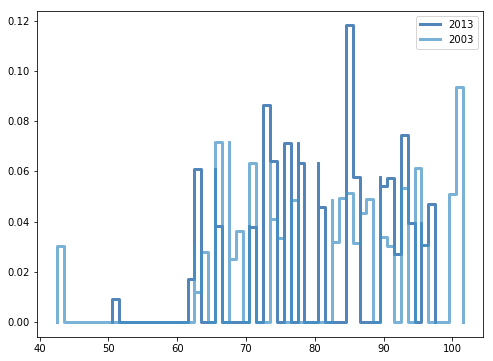

In [407]:
# And now I am comparing my data in 2003 and 2013.
tp.PrePlot(2)
tp.Pmfs([third_Pmf,second_Pmf])
tp.Show()

In [ ]:
#PART 7
# So finally i can say that money is not eqauls to happines because for example in 2013 some teams which paid less salary win the more match.
# But in 2003 the team which paid most salary also win the more match.